In [ ]:
# file:///C:/Users/Kyle/Downloads/Supervised%20Learning%20Rubric.pdf
# https://www.basketball-reference.com/teams/LAL/2025/gamelog/

Will the lakers win their next game? Logistic Regression on 24-25 season

Problem:
How does the lakers currently perform this season? How well will the lakers perform against different teams this season? How well will the lakers perform in the next game? All of these questions can be answered using this logistic regression model that predicts whether or not the lakers will win when evaluating features such as

Exploratory Data Analysis (EDA) procedure:
Since the model that will be used is logistic regression, an ROC curve will be used to determine the model's true positive rate and the false positive rate. Other metrics that will also be evaluated are precision and recall of the predictions. 

In [26]:
from math import exp
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Collecting and Cleaning Data:
To collect the data I visited basketball-reference.com and selected the advanced game log data of each game from the current 2024-25 season. There was an option to download a csv so I took it and formatted it on a spreadsheet. There were a few issues with the dataset. One issue was that there were some features that could not be used in logistic regression since those were not relevant so those were dropped, namely the dates and game count.

In [71]:
class data_import:

    def __init__(self):
        df = pd.read_csv("../laker_data.csv")
        
        # encode the opponent teams into numbers
        encoder = LabelEncoder()
        team_labels = encoder.fit_transform(df["Opp"])
        df["Opp"] = team_labels

        y = df["W/L"].values
        x = df.drop("W/L", axis=1).values

        print(df)
        self.train_x, self.test_x, self.train_y, self.test_y = train_test_split(x, y, test_size = 0.2, random_state = 42)

data = data_import()

    Location  Opp  W/L   Tm  Opp.1  FG  FGA    FG%  3P  3PA  ...  FTopp  \
0          0    6    1  110    103  42   95  0.442   5   30  ...     20   
1          0   11    1  123    116  40   75  0.533  14   27  ...     15   
2          0   13    1  131    127  48   92  0.522  14   34  ...     22   
3          1   11    0  105    109  39   94  0.415  14   32  ...     18   
4          1    1    0  110    134  38   77  0.494   6   28  ...      5   
5          1   15    1  131    125  42   88  0.477  11   32  ...     11   
6          1    3    0  103    115  37   85  0.435   9   25  ...     17   
7          1    4    0  114    131  41   93  0.441  15   48  ...     18   
8          0   10    1  116    106  44   85  0.518  16   35  ...     15   
9          0   15    1  123    103  44   86  0.512  12   37  ...     19   
10         0    4    1  128    123  43   85  0.506  20   41  ...     27   
11         1   14    1  120    115  44   88  0.500  14   31  ...     12   
12         1    7    1  1

Building Logistic Regression Model

In [41]:
clf = LogisticRegression(solver="liblinear").fit(data.train_x, data.train_y)

yp = clf.predict(data.test_x)
ypp = clf.predict_proba(data.test_x)

Plotting the ROC curve

Text(0.7, 0.2, 'AUC=1.000')

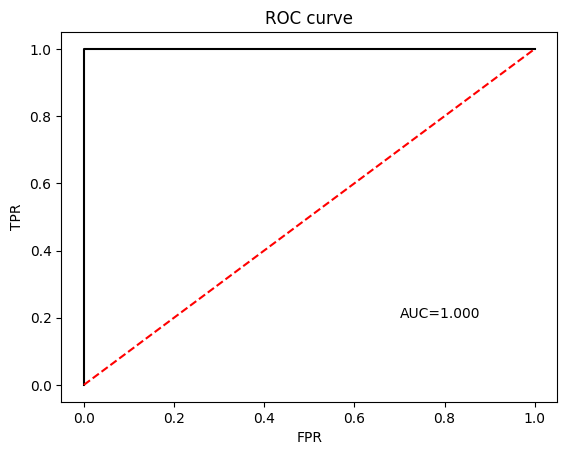

In [69]:
fpr, tpr, th = roc_curve(data.test_y,ypp[:,1])
auc = roc_auc_score(data.test_y,ypp[:,1])
plt.plot(fpr,tpr,"k-")
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), "r--")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.text(0.7, 0.2,"AUC=" + "{:.3f}".format(auc))

Calculate Precision and Recall

In [67]:
def calculate_precision(y_true, y_pred):
    # true positive divided by true and false positives
    n = len(y_true)
    tp = 0
    fp = 0
    for i in range(n):
        if y_true[i] == 1 and y_pred[i] == 1: # check for true positive
            tp += 1
        elif y_true[i] == 0 and y_pred[i] == 1: # check for false positive
            fp += 1
    return tp / (tp + fp)

def calculate_recall(y_true, y_pred):
    # true positive divided by true positive and false negatives
    n = len(y_true)
    tp = 0
    fn = 0
    for i in range(n):
        if y_true[i] == 1 and y_pred[i] == 1: # check for true positive
            tp += 1
        elif y_true[i] == 1 and y_pred[i] == 0: # check for false negative
            fn += 1
    
    return tp/(tp + fn)

precision = calculate_precision(data.test_y, yp)
recall = calculate_recall(data.test_y, yp)
print('Model Precision : ' , precision)
print('Model Recall : ' , recall)
print("y true: ", data.test_y)
print("y prediction: ", yp)

Model Precision :  1.0
Model Recall :  0.6666666666666666
y true:  [1 0 1 0 1]
y prediction:  [0 0 1 0 1]


In [70]:
predictions = []
print(ypp)
print("actual y: ", data.test_y)
print("y predictions: ",yp)

for i in range(len(ypp)):
    if ypp[i][1] > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

# print(predictions)

[[6.95554540e-01 3.04445460e-01]
 [9.99873140e-01 1.26859887e-04]
 [1.12990341e-02 9.88700966e-01]
 [7.54866493e-01 2.45133507e-01]
 [9.66898985e-02 9.03310101e-01]]
actual y:  [1 0 1 0 1]
y predictions:  [0 0 1 0 1]


Results and Discussion/Conclusion:
To recap, the 